<a href="https://colab.research.google.com/github/achmadbauravindah/ImageClassification-CNN-RockPaperScissorsImagesDataset/blob/main/ImageClassification_CNN_RockPaperScissorsImagesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Achmad Bauravindah

Email: baurav99@gmail.com

Asal: Pasuruan, Jawa Timur

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten # Layer
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Preprocessing Data
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger # Callback
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Get data from Kaggle (Rock Paper Scissor Data Image)
_ = ! git clone https://github.com/achmadbauravindah/ravin_kaggle_credential.git # get credential from kaggle
_ = ! pip install kaggle # install kaggle on device
_ = ! mkdir ~/.kaggle # make hidden folder .kaggle to configure credential
_ = ! cp ravin_kaggle_credential/kaggle.json ~/.kaggle/ # copy credential from github to .kaggle folder
_ = ! chmod 600 ~/.kaggle/kaggle.json # change access
_ = ! kaggle datasets download rock-paper-scissor-images-dataset # which dataset to download
_ = ! unzip rock-paper-scissor-images-dataset # unzip if data zipped

In [3]:
images_dir = '/content/RockPaperScissor_Images_Dataset' 

In [4]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest',
                    validation_split = 0.4 # Data Splitting into 40% for validation data
                    )

In [5]:
train_generator = datagen.flow_from_directory(images_dir,
                                              target_size=(200,200),
                                              batch_size=4,
                                              classes=['paper', 'rock', 'scissors'],
                                              class_mode='categorical',
                                              subset='training')

validation_generator = datagen.flow_from_directory(images_dir,
                                              target_size=(200,200),
                                              batch_size=4,
                                              classes=['paper', 'rock', 'scissors'],
                                              class_mode='categorical',
                                              subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


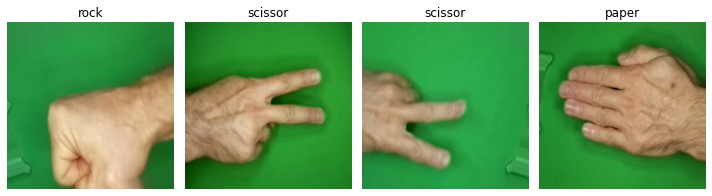

In [6]:
# Sample Images
images, labels = next(validation_generator) # get 1 batch of image generator
def plotImagesPerBatch(images_arr, labels):
  fig, axes = plt.subplots(1, 4, figsize=(10,10))
  axes = axes.flatten()
  x=0
  for img, label, ax in zip(images_arr, labels, axes):

    # get label
    label_index = np.argmax(label)
    if label_index == 0:
      label_name = 'paper'
    elif label_index == 1:
      label_name = 'rock'
    else:
      label_name = 'scissor'

    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label_name)
    x = x+1
  plt.tight_layout()
  plt.show
plotImagesPerBatch(images, labels)

In [7]:
# Create Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(7, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(13, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(17, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 4)       112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 7)         259       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 7)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 13)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 13)       0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# Create Callback

# 1 Callback untuk mendapatkan checkpoint setiap akurasi yang membaik dari tiap epoch
checkpoint_filepath = '/content/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
checkpointCallback = ModelCheckpoint(filepath=checkpoint_filepath,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_best_only=True)

# 2 Callback untuk menghentikan proses training pada rentang akurasi tertentu (di-set 100%)
class stopTrainingCallback(Callback):
  def on_epoch_end(self, epoch,logs={}):
    if (logs.get('val_accuracy') >= 1):
      print('\n Yeyy Akurasimu mencapai 100% 🤩')
      self.model.stop_training = True

# 3 Callback mendapatkan accuracy, loss, val_loss, val_accuracy dan disimpan pada csv
log_csv = CSVLogger('rock_paper_scissor_classification_result.csv', separator=';', append=False)

In [11]:
callback_list = [checkpointCallback, stopTrainingCallback(), log_csv]

In [12]:
history = model.fit(train_generator,
                    steps_per_epoch=20,  # berapa batch yang akan dieksekusi pada setiap epoch
                    epochs=50,
                    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                    validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
                    verbose=1,
                    callbacks=callback_list)

Epoch 1/50
20/20 [==============================] - 4s 186ms/step - loss: 1.1063 - accuracy: 0.3375 - val_loss: 1.1361 - val_accuracy: 0.2500
Epoch 2/50
20/20 [==============================] - 4s 175ms/step - loss: 1.1008 - accuracy: 0.3625 - val_loss: 1.0995 - val_accuracy: 0.3000
Epoch 3/50
20/20 [==============================] - 5s 253ms/step - loss: 1.1038 - accuracy: 0.2625 - val_loss: 1.0971 - val_accuracy: 0.3500
Epoch 4/50
20/20 [==============================] - 5s 253ms/step - loss: 1.0983 - accuracy: 0.3000 - val_loss: 1.0951 - val_accuracy: 0.3500
Epoch 5/50
20/20 [==============================] - 3s 148ms/step - loss: 1.0950 - accuracy: 0.4125 - val_loss: 1.1197 - val_accuracy: 0.1500
Epoch 6/50
20/20 [==============================] - 3s 149ms/step - loss: 1.1020 - accuracy: 0.4125 - val_loss: 1.0782 - val_accuracy: 0.4500
Epoch 7/50
20/20 [==============================] - 3s 159ms/step - loss: 1.0900 - accuracy: 0.4125 - val_loss: 1.0791 - val_accuracy: 0.3500
Epoch 

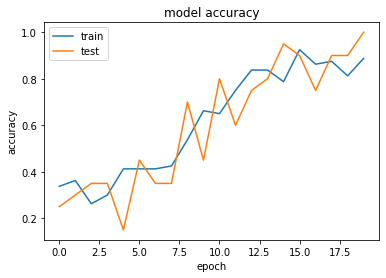

In [13]:
# Show Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Saving 0P6uxM8Vr1DwySHe.png to 0P6uxM8Vr1DwySHe.png
rock


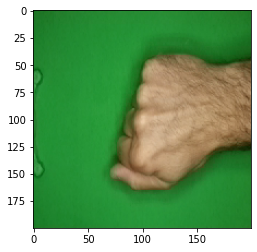

In [14]:
uploaded = files.upload()

image_label = ['paper', 'rock', 'scissor']
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,200))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images)
  class_index = np.argmax(classes)
  class_name = image_label[class_index]
  print(class_name)

In [15]:
# Save Model
model.save('rock_paper_scissor_classification.h5')